In [30]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [31]:
# Memuat dataset
phy_data = pd.read_csv("physionet_heart_data.csv")

In [32]:
phy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Columns: 167 entries, Unnamed: 0 to ageCat
dtypes: float64(119), int64(33), object(15)
memory usage: 2.6+ MB


In [4]:
# Tampilkan jumlah baris dan kolom sebelum pra-pemrosesan
print("Jumlah baris dan kolom sebelum pra-pemrosesan:", phy_data.shape)

Jumlah baris dan kolom sebelum pra-pemrosesan: (2008, 167)


In [33]:
phy_data.head(50)

,Unnamed: 0,inpatient.number,DestinationDischarge,admission.ward,admission.way,occupation,discharge.department,visit.times,gender,body.temperature,...,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay,ageCat
0,1,857781,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Male,36.7,...,37.0,97.0,93.0,95.9,17.8,1.14,125.0,15,11,"(69,79]"
1,2,743087,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,8,"(69,79]"
2,3,866418,Home,Cardiology,NonEmergency,farmer,Cardiology,2,Male,36.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(59,69]"
3,4,775928,Home,Cardiology,Emergency,UrbanResident,Cardiology,1,Male,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,11,"(69,79]"
4,5,810128,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,5,"(69,79]"
5,6,823318,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,6,"(79,89]"
6,7,844094,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,2,Male,36.0,...,37.0,93.0,78.0,92.9,13.5,1.13,124.0,15,10,"(79,89]"
7,8,787530,HealthcareFacility,Cardiology,Emergency,UrbanResident,Cardiology,1,Female,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,27,"(69,79]"
8,9,795420,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.2,...,37.0,98.0,103.0,97.1,7.3,1.13,98.0,15,20,"(79,89]"
9,10,829801,Home,Cardiology,NonEmergency,UrbanResident,Cardiology,1,Female,36.5,...,37.0,87.0,56.0,86.6,13.9,1.07,135.0,15,4,"(69,79]"


In [6]:
phy_data.describe()

,Unnamed: 0,inpatient.number,visit.times,body.temperature,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,...,carboxyhemoglobin,body.temperature.blood.gas,oxygen.saturation,partial.oxygen.pressure,oxyhemoglobin,anion.gap,free.calcium,total.hemoglobin,GCS,dischargeDay
count,2008.00000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,2008.000000,...,992.000000,993.0,993.000000,993.000000,992.000000,993.000000,993.000000,992.000000,2008.000000,2008.000000
mean,1004.50000,797747.542829,1.092629,36.416484,85.235060,19.085657,131.056773,76.573207,94.734396,52.483715,...,0.605645,37.0,95.806647,108.121853,94.938710,14.022457,1.110393,124.088710,14.831175,9.420817
std,579.80399,41127.801740,0.365946,0.439529,21.539214,1.737546,24.741670,14.461247,16.323762,10.895935,...,0.560946,0.0,6.212864,37.422666,6.205458,4.153747,0.052645,24.638623,1.179836,8.030256
min,1.00000,722128.000000,1.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,37.0,25.000000,20.000000,24.300000,-1.200000,0.890000,35.000000,3.000000,1.000000
25%,502.75000,763164.500000,1.000000,36.200000,70.000000,18.000000,113.000000,65.000000,83.333333,45.000000,...,0.300000,37.0,95.000000,80.000000,94.500000,11.700000,1.080000,110.000000,15.000000,6.000000
50%,1004.50000,798758.000000,1.000000,36.300000,82.000000,19.000000,130.000000,76.000000,93.333333,50.000000,...,0.400000,37.0,98.000000,102.000000,96.600000,13.800000,1.110000,127.000000,15.000000,8.000000
75%,1506.25000,829399.750000,1.000000,36.500000,98.000000,19.000000,146.250000,85.000000,104.666667,60.000000,...,0.800000,37.0,99.000000,134.000000,97.800000,16.100000,1.140000,139.000000,15.000000,10.000000
max,2008.00000,905720.000000,5.000000,42.000000,198.000000,36.000000,252.000000,146.000000,181.333333,115.000000,...,5.300000,37.0,100.000000,255.000000,99.100000,43.700000,1.390000,203.000000,15.000000,123.000000


In [7]:
# Melihat jumlah missing values per kolom
phy_data.isnull().sum()

Unnamed: 0                 0
inpatient.number           0
DestinationDischarge       0
admission.ward             0
admission.way              0
                        ... 
free.calcium            1015
total.hemoglobin        1016
GCS                        0
dischargeDay               0
ageCat                     0
Length: 167, dtype: int64

In [8]:
# Hapus kolom yang tidak diperlukan
df = phy_data.drop(['Unnamed: 0', 'inpatient.number', 'DestinationDischarge', 'admission.ward', 'admission.way',
                    'occupation', 'discharge.department', 'visit.times', 'dischargeDay'], axis=1)

In [9]:
# Buat variabel outcome_rd
df['outcome_rd'] = df['death.within.6.months'] + df['re.admission.within.6.months']

In [10]:
# Hapus kolom terkait hasil lainnya
df = df.drop(['death.within.28.days', 'death.within.3.months', 'death.within.6.months',
              're.admission.within.28.days', 're.admission.within.3.months', 're.admission.within.6.months',
              'time.of.death..days.from.admission.', 're.admission.time..days.from.admission.',
              'return.to.emergency.department.within.6.months',
              'time.to.emergency.department.within.6.months', 'outcome.during.hospitalization'], axis=1)

In [11]:
# Tampilkan jumlah baris dan kolom setelah pra-pemrosesan
print("Jumlah baris dan kolom setelah pra-pemrosesan:", df.shape)

Jumlah baris dan kolom setelah pra-pemrosesan: (2008, 148)


In [12]:
# Enkode variabel kategori menjadi numerik
mapping = {
    'gender': {'Male': 0, 'Female': 1},
    'type.of.heart.failure': {'Both': 0, 'Right': 1, 'Left': 2},
    'NYHA.cardiac.function.classification': {'III': 0, 'II': 1, 'IV': 2},
    'Killip.grade': {'III': 0, 'I': 1, 'II': 2, 'IV': 3},
    'type.II.respiratory.failure': {'NonTypeII': 0, 'TypeII': 1},
    'consciousness': {'Clear': 0, 'ResponsiveToPain': 1, 'ResponsiveToSound': 2, 'Nonresponsive': 3},
    'respiratory.support.': {'None': 0, 'NIMV': 1, 'IMV': 2},
    'oxygen.inhalation': {'OxygenTherapy': 0, 'AmbientAir': 1},
    'ageCat': {'(69,79]': 5, '(59,69]': 4, '(79,89]': 6, '(49,59]': 3, '(89,110]': 7,
               '(29,39]': 1, '(39,49]': 2, '(21,29]': 0}
}

df = df.replace(mapping)

In [13]:
# Pisahkan fitur (df_x) dan target (df_y)
df_x = df.drop('outcome_rd', axis=1)
df_y = df['outcome_rd']

In [14]:
# Hapus fitur dengan nilai yang hilang lebih dari 50%
missing_threshold = 0.5
missing_percentages = df_x.isnull().mean()
df_x = df_x.loc[:, missing_percentages < missing_threshold]

In [15]:
# Tampilkan jumlah baris dan kolom setelah menghapus fitur dengan nilai yang hilang lebih dari 50%
print("Jumlah baris dan kolom setelah menghapus fitur dengan nilai yang hilang lebih dari 50%:", df_x.shape)

Jumlah baris dan kolom setelah menghapus fitur dengan nilai yang hilang lebih dari 50%: (2008, 107)


In [16]:
# Periksa nilai null sebelum imputasi
print("Jumlah nilai null sebelum imputasi:\n", df_x.isnull().sum())

Jumlah nilai null sebelum imputasi:
 gender                                    0
body.temperature                          0
pulse                                     0
respiration                               0
systolic.blood.pressure                   0
                                       ... 
low.density.lipoprotein.cholesterol     198
triglyceride                            198
high.density.lipoprotein.cholesterol    198
GCS                                       0
ageCat                                    0
Length: 107, dtype: int64


In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42, stratify=df_y)

In [18]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Prediksi
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

In [20]:
# Evaluasi Model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.86      0.73       236
           1       0.59      0.28      0.38       166

    accuracy                           0.62       402
   macro avg       0.61      0.57      0.56       402
weighted avg       0.62      0.62      0.59       402

Accuracy: 0.6243781094527363
Precision: 0.5949367088607594
Recall: 0.28313253012048195
F1 Score: 0.3836734693877551
ROC AUC Score: 0.638362773126404


Evaluasi Random Forest tanpa imputasi dan tanpa standarisasi
Accuracy: 0.6244
Precision: 0.5949
Recall: 0.2831
F1 Score: 0.3837
ROC AUC Score: 0.5738


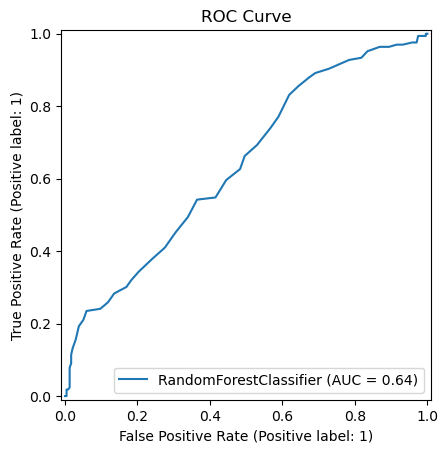

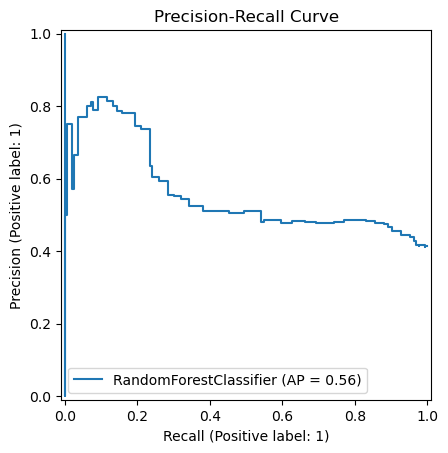


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73       236
           1       0.59      0.28      0.38       166

    accuracy                           0.62       402
   macro avg       0.61      0.57      0.56       402
weighted avg       0.62      0.62      0.59       402



In [21]:
# Fungsi evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.title('ROC Curve')
    plt.show()

    # Plot Precision-Recall Curve
    PrecisionRecallDisplay.from_estimator(model, X_test, y_test)
    plt.title('Precision-Recall Curve')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# Evaluasi model Random Forest
print("Evaluasi Random Forest tanpa imputasi dan tanpa standarisasi")
evaluate_model(rf_model, X_test, y_test)

In [22]:
# Validasi Cross Validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, df_x, df_y, cv=10, scoring='f1')
print("Cross-Validated F1 Scores:", cv_scores)
print("Mean CV F1 Score:", np.mean(cv_scores))

Cross-Validated F1 Scores: [0.44262295 0.47482014 0.5        0.35658915 0.38655462 0.336
 0.43076923 0.38016529 0.42857143 0.44067797]
Mean CV F1 Score: 0.4176770778538678


In [23]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Fungsi untuk melakukan cross-validation dan menampilkan hasilnya
def cross_validate_model(model, X, y, cv_splits=10):
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f"Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

    for metric in scoring[1:]:
        scores = cross_val_score(model, X, y, cv=skf, scoring=metric)
        print(f"Cross-Validation {metric.capitalize()}: {scores.mean():.4f} ± {scores.std():.4f}")

# Lakukan validasi untuk model tanpa imputasi dan standarisasi
print("Cross-validation for model WITHOUT imputation and standardization")
cross_validate_model(rf_model, df_x, df_y)

Cross-validation for model WITHOUT imputation and standardization
Cross-Validation Accuracy: 0.6295 ± 0.0250
Cross-Validation Precision: 0.5988 ± 0.0581
Cross-Validation Recall: 0.3241 ± 0.0261
Cross-Validation F1: 0.4197 ± 0.0320
Cross-Validation Roc_auc: 0.6470 ± 0.0351


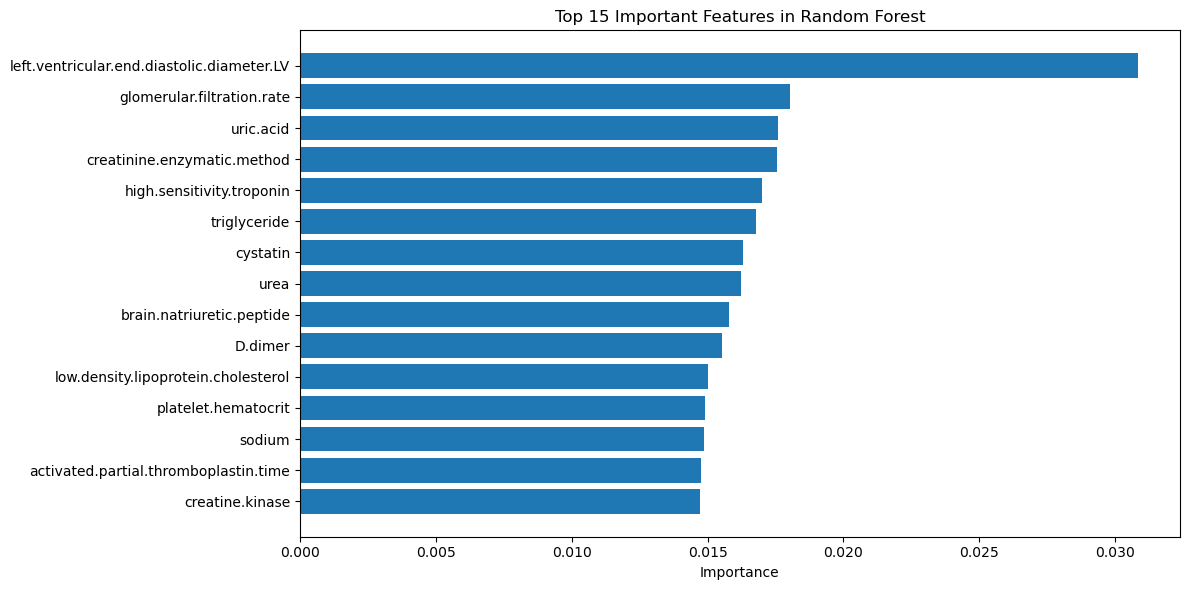

In [24]:
# Feature Importance
importances = rf_model.feature_importances_
feature_names = df_x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:15], feature_importance_df['Importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Important Features in Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [25]:
# Hitung feature importance
importances = rf_model.feature_importances_
feature_names = df_x.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

In [26]:
# Ambil 5 fitur terpenting dan 5 terbawah
top_5 = feature_importance_df.head(5)
bottom_5 = feature_importance_df.tail(5)

In [27]:
# Gabungkan untuk visualisasi
combined = pd.concat([top_5, bottom_5])
combined_sorted = combined.sort_values(by='Importance', ascending=True)

In [28]:
# Tampilkan hasil dalam tabel
print("\nTop 5 Fitur Paling Berpengaruh:")
print(top_5.to_string(index=False))

print("\nTop 5 Fitur Paling Tidak Berpengaruh:")
print(bottom_5.to_string(index=False))


Top 5 Fitur Paling Berpengaruh:
                                   Feature  Importance
left.ventricular.end.diastolic.diameter.LV    0.030837
                glomerular.filtration.rate    0.018015
                                 uric.acid    0.017607
               creatinine.enzymatic.method    0.017545
                 high.sensitivity.troponin    0.017010

Top 5 Fitur Paling Tidak Berpengaruh:
            Feature  Importance
         hemiplegia    0.000053
acute.renal.failure    0.000023
           leukemia    0.000000
 malignant.lymphoma    0.000000
               AIDS    0.000000


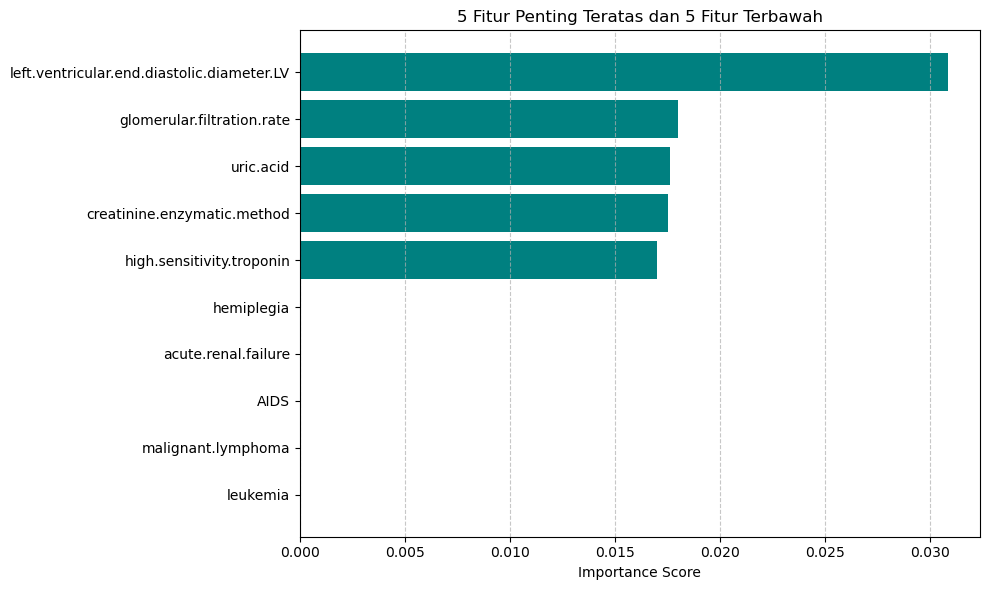

In [29]:
# Visualisasi diagram batang horizontal
plt.figure(figsize=(10, 6))
plt.barh(combined_sorted['Feature'], combined_sorted['Importance'], color='teal')
plt.xlabel('Importance Score')
plt.title('5 Fitur Penting Teratas dan 5 Fitur Terbawah')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()